<a href="https://colab.research.google.com/github/subarno1/python/blob/main/U3A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset



```
`# This is formatted as code`
```

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [36]:
type(df)

pandas.core.frame.DataFrame

In [37]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [38]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [39]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [40]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [41]:
df['salary'].mean()

113706.45843828715

In [42]:
df['salary'].median()

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [43]:
dfnew = df[['sex','salary']]

In [44]:
print(dfnew)

      sex  salary
0    Male  139750
1    Male  173200
2    Male   79750
3    Male  115000
4    Male  141500
..    ...     ...
392  Male  103106
393  Male  150564
394  Male  101738
395  Male   95329
396  Male   81035

[397 rows x 2 columns]


In [45]:
dfnew[dfnew['sex']=='Male']['salary'].median()


108043.0

Finding the Median salary for all females

In [46]:
dfnew[dfnew['sex']=='Female']['salary'].median()


103750.0

Comparing the Mean salary of Males and Females

In [47]:
malesal = dfnew[dfnew['sex']=='Male']['salary'].median()


In [48]:
femsal = dfnew[dfnew['sex']=='Female']['salary'].median()


In [49]:
malesal - femsal

4293.0

# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [56]:
(df['yrs.service']>=20)

0      False
1      False
2      False
3       True
4       True
       ...  
392     True
393    False
394     True
395    False
396    False
Name: yrs.service, Length: 397, dtype: bool

In [57]:
df[df['yrs.service']>=20]['salary'].mean()

122520.65605095541

Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [58]:
dfex = df[df['yrs.service']>=20]['salary'].mean()


In [59]:
dflx = df[df['yrs.service']<=20]['salary'].mean()


In [60]:
dfex - dflx

13751.880050955413

People who have salary of greater than or equal to 200,000

In [61]:
(df['salary']>=200000)

0      False
1      False
2      False
3      False
4      False
       ...  
392    False
393    False
394    False
395    False
396    False
Name: salary, Length: 397, dtype: bool

In [62]:
sum((df['salary']>=200000))

3



```
# This is formatted as code
```

Your Findings here... Only three people have a salary greater than two hundred thousand.



# Rename values, subset columns, etc

In [63]:
df.rename(columns = {'yrs.service':'YearsOfService'})

,Unnamed: 0,rank,discipline,yrs.since.phd,YearsOfService,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


In [66]:
df.drop(1)

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
5,6,AssocProf,B,6,6,Male,97000
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


# Create some simple visualizations showing some simple statistics

In [67]:
import matplotlib.pyplot as plt

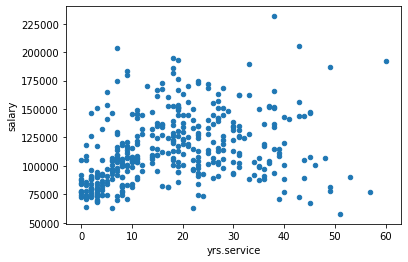

In [82]:
df.plot(kind= 'scatter', x = 'yrs.service', y = 'salary')


Your observations from the visuals: 

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

A majority of the employees have worked for 10-15 years, the years of service does not have a direct influence on the individuals salary, males statistically earn more than females, and only three individuals earn more than 200 thousand dollars a year. 


